In [1]:
import numpy
print('numpy: {}'.format(numpy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

numpy: 1.14.5
pandas: 0.23.1


In [2]:
!pwd

/Users/jakewendt/github/jakewendt/notebooks


vcf header

```
FORMAT=<ID=AD,Number=.,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
FORMAT=<ID=DP,Number=1,Type=Integer,Description="Read depth">
FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype quality">
FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
FORMAT=<ID=PL,Number=G,Type=Integer,Description="The phred-scaled genotype likelihoods rounded to the closest integer">

INFO=<ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
INFO=<ID=AF,Number=A,Type=Float,Description="Allele frequency, for each ALT allele, in the same order as listed">
INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">
INFO=<ID=BaseQRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt Vs. Ref base qualities">
INFO=<ID=ClippingRankSum,Number=1,Type=Float,Description="Z-score From Wilcoxon rank sum test of Alt vs. Ref number of hard clipped bases">
INFO=<ID=DB,Number=0,Type=Flag,Description="dbSNP membership">
INFO=<ID=DP,Number=1,Type=Integer,Description="Combined depth across samples">
INFO=<ID=ExcessHet,Number=1,Type=Float,Description="Phred-scaled p-value for exact test of excess heterozygosity">
INFO=<ID=FS,Number=1,Type=Float,Description="Phred-scaled p-value using Fisher's exact test to detect strand bias">
INFO=<ID=InbreedingCoeff,Number=1,Type=Float,Description="Inbreeding coefficient as estimated from the genotype likelihoods per-sample when compared against the Hardy-Weinberg expectation">
INFO=<ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts, for each ALT allele, in the same order as listed">
INFO=<ID=MLEAF,Number=A,Type=Float,Description="Maximum likelihood expectation (MLE) for the allele frequency, for each ALT allele, in the same order as listed">
INFO=<ID=MQ,Number=1,Type=Float,Description="RMS mapping quality">
INFO=<ID=MQRankSum,Number=1,Type=Float,Description="Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities">
INFO=<ID=QD,Number=1,Type=Float,Description="Variant Confidence/Quality by Depth">
INFO=<ID=ReadPosRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias">
INFO=<ID=SOR,Number=1,Type=Float,Description="Symmetric Odds Ratio of 2x2 contingency table to detect strand bias">
```

NEEDS UPDATED

TSV files created like ...

bcftools query -i 'TYPE="snp"' -f '%CHROM\t%POS\t%QUAL\t%AN\t%DB\t%QD\t%MQ\t[%DP]\t[%GQ]\n' FILE >> FILE.snp.tsv

NEEDS UPDATED

In [3]:
file = "data/186069.snp.tsv"

In [4]:
import glob
print(glob.glob(file))

['data/186069.snp.tsv']


In [5]:
#df = pandas.read_csv(file, delimiter="\t")

#df = pandas.read_csv(file, delimiter="\t", dtype={ 'QD': float })

df = pandas.read_csv(file, delimiter="\t", dtype={ 'CHROM': str, 'QD': float }, na_values = ".")


In [6]:
# change QD from "."/NaN to 0.0
df = df.replace({
    'QD': {
        numpy.nan : 0.0,
    },
})

In [7]:
df.head()

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
0,1,12807,C,T,46.77,2,1.0,2.60,25.57,18,75,0.000,-1.281,-0.099
1,1,13273,G,C,728.77,2,1.0,30.37,35.42,24,72,0.000,NaN,NaN
2,1,13418,G,A,148.77,2,1.0,5.51,29.65,27,99,5.724,-2.237,-1.157
3,1,13770,C,G,97.77,2,NaN,2.88,24.41,34,99,14.827,0.264,-0.629
4,1,13838,C,T,175.77,2,1.0,3.59,24.69,49,99,0.000,-4.403,-0.633


In [8]:
df['DB'].value_counts()

1.0    4426703
Name: DB, dtype: int64

DB=1 means its in dbSNP?

In [9]:
df['AN'].value_counts()

2    4697053
Name: AN, dtype: int64

So the AN field is pointless?

In [10]:
import matplotlib.pyplot as plt

In [11]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [16.0,6.0]

In [12]:
notdbsnp=df[pandas.isna(df['DB'])]

In [13]:
notdbsnp.shape

(270350, 14)

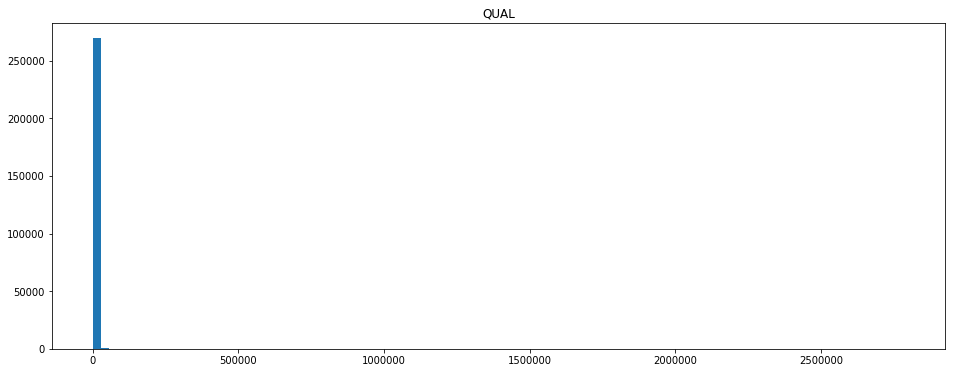

In [14]:
plt.hist(notdbsnp['QUAL'], bins=100)
plt.title('QUAL')
plt.show()

In [15]:
notdbsnp[notdbsnp['QUAL'] > 10000].shape

(4159, 14)

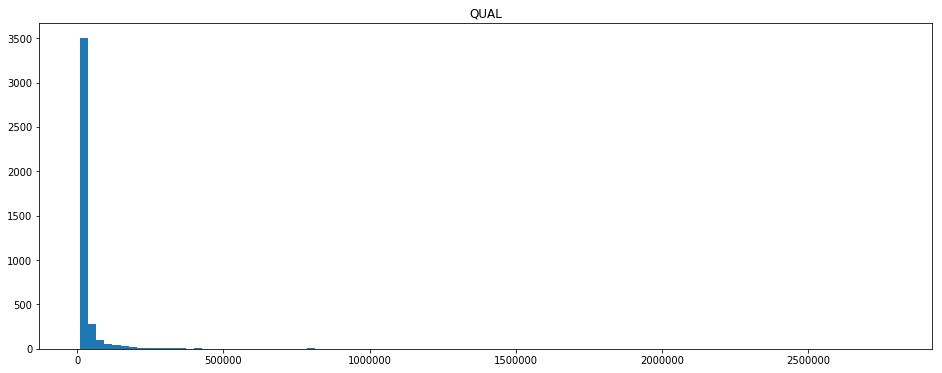

In [16]:
plt.hist(notdbsnp[notdbsnp['QUAL'] > 10000]['QUAL'], bins=100)
plt.title('QUAL')
plt.show()

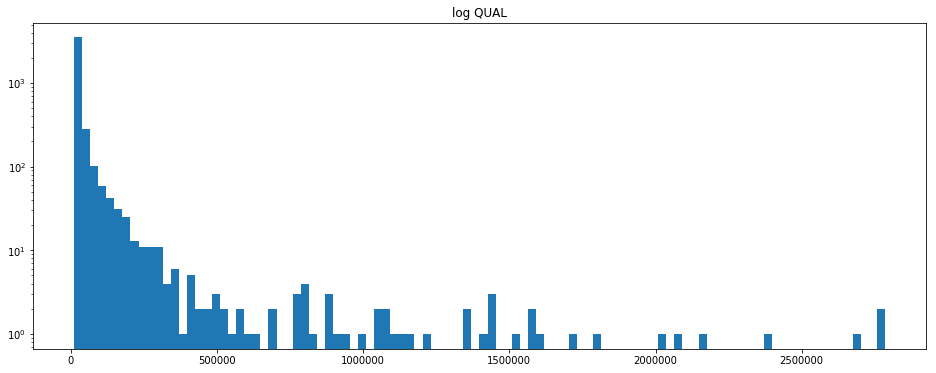

In [17]:
plt.hist(notdbsnp[notdbsnp['QUAL'] > 10000]['QUAL'], bins=100)
plt.title('log QUAL')
plt.yscale('log')
plt.show()

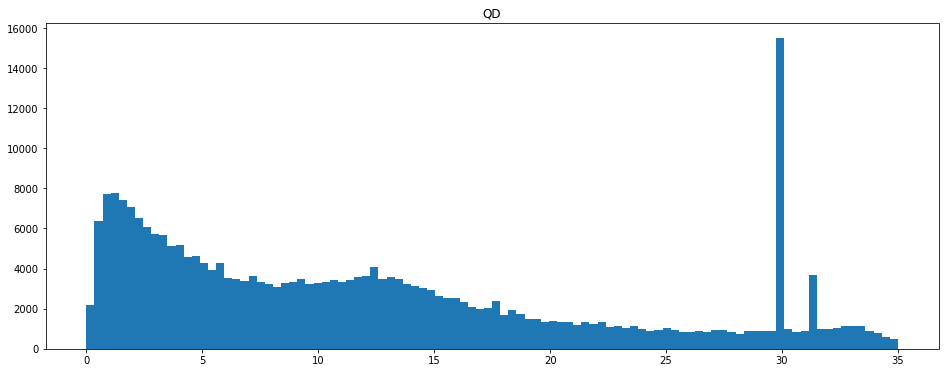

In [18]:
plt.hist(notdbsnp['QD'], bins=100)
plt.title('QD')
plt.show()

In [19]:
notdbsnp[ notdbsnp['QD'] < 2 ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
57,1,96157,T,C,82.77,2,NaN,1.80,21.72,46,99,1.417,-1.429,0.129
169,1,181384,G,C,68.77,2,NaN,1.60,54.77,43,97,0.000,-0.181,0.461
172,1,181815,G,T,60.77,2,NaN,0.45,36.01,134,89,2.542,0.199,-0.666
174,1,182063,A,C,146.77,2,NaN,1.09,38.09,135,99,0.953,-2.689,0.997
176,1,182105,G,C,46.77,2,NaN,0.58,41.83,80,75,2.914,-2.864,-0.852
178,1,182441,T,A,58.77,2,NaN,1.68,28.28,35,87,8.127,-2.593,0.039
181,1,183358,G,C,284.77,2,NaN,1.52,32.09,187,99,3.775,-0.905,-0.168
182,1,183598,C,G,233.77,2,NaN,1.31,41.15,179,99,4.131,-4.566,0.442
191,1,186664,G,A,184.77,2,NaN,1.28,36.88,144,99,0.000,-2.618,0.662
193,1,186728,A,T,153.77,2,NaN,1.79,41.43,86,99,21.524,-3.106,-3.270


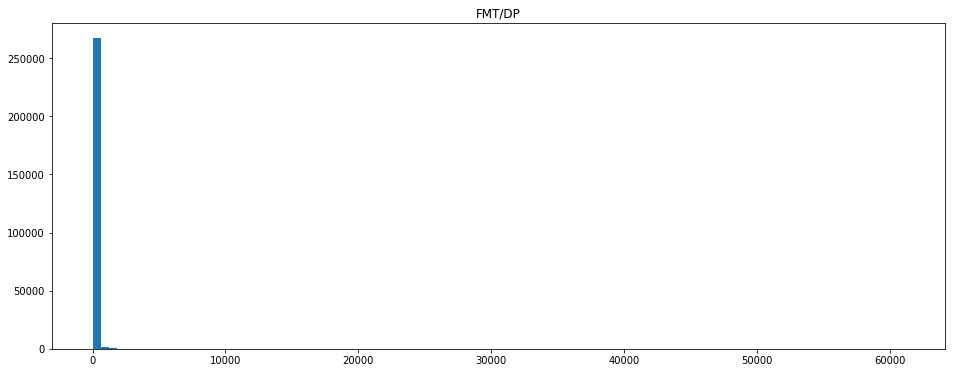

In [20]:
plt.hist(notdbsnp['FMT/DP'], bins=100)
plt.title('FMT/DP')
plt.show()

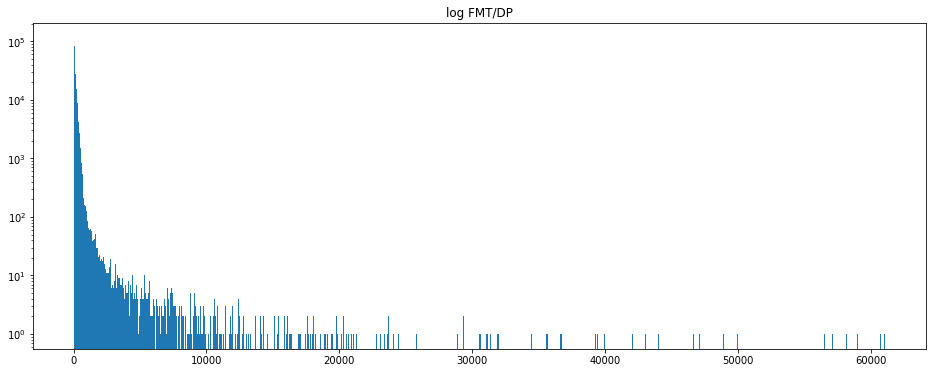

In [21]:
plt.hist(notdbsnp['FMT/DP'], bins=1000)
plt.title('log FMT/DP')
plt.yscale('log')
plt.show()

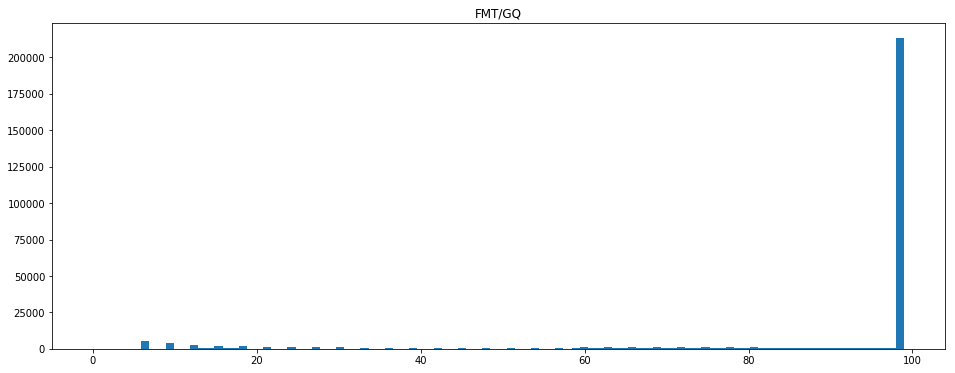

In [22]:
plt.hist(notdbsnp['FMT/GQ'], bins=100)
plt.title('FMT/GQ')
plt.show()

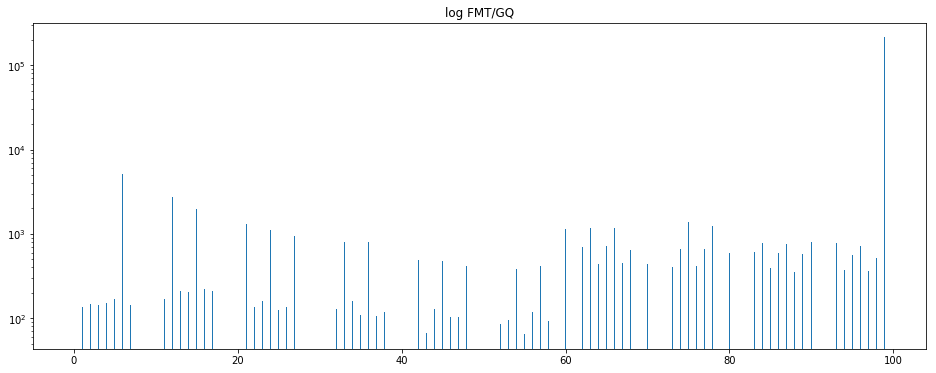

In [23]:
plt.hist(notdbsnp['FMT/GQ'], bins=1000)
plt.title('log FMT/GQ')
plt.yscale('log')
plt.show()

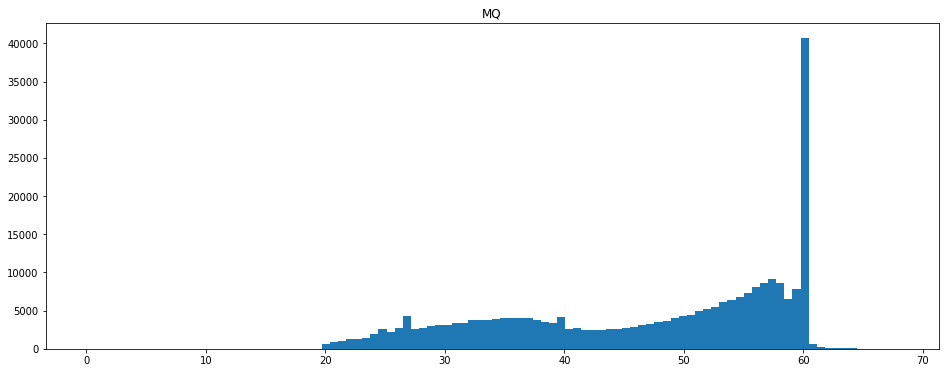

In [24]:
plt.hist(notdbsnp['MQ'], bins=100)
plt.title('MQ')
plt.show()

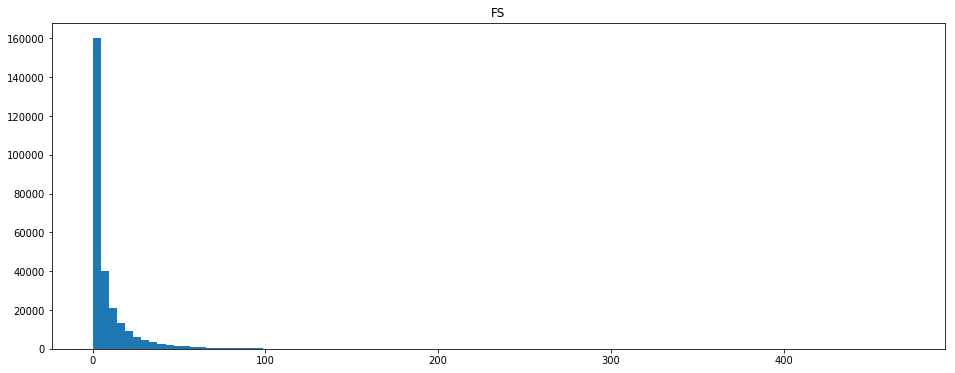

In [25]:
plt.hist(notdbsnp['FS'], bins=100)
plt.title('FS')
plt.show()

In [26]:
notdbsnp[ notdbsnp['FS'] > 60 ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
1866,1,1338234,T,C,38.77,2,NaN,0.76,60.00,51,67,62.029,-0.012,-3.167
4210,1,2500106,A,C,86.77,2,NaN,1.28,60.00,68,99,73.888,-0.007,1.736
4426,1,2671858,G,A,2997.77,2,NaN,11.76,28.09,255,99,61.183,-0.995,1.357
24198,1,12949056,G,C,395.77,2,NaN,12.77,25.67,31,99,62.932,0.060,-0.540
31341,1,16172280,T,C,80.77,2,NaN,1.65,60.00,49,99,86.542,-0.014,-2.935
44961,1,22916515,A,C,273.77,2,NaN,5.82,60.00,47,99,67.137,-0.013,-3.080
49051,1,25185890,A,C,133.77,2,NaN,4.18,60.00,32,99,70.219,-0.022,-3.242
52729,1,27878473,G,A,759.77,2,NaN,21.71,58.51,35,99,73.781,-0.017,-2.195
56666,1,30383843,G,C,228.77,2,NaN,5.32,36.56,43,99,90.718,-5.170,0.251
75368,1,44536967,A,C,138.77,2,NaN,3.85,60.00,36,99,74.809,-0.019,-3.729


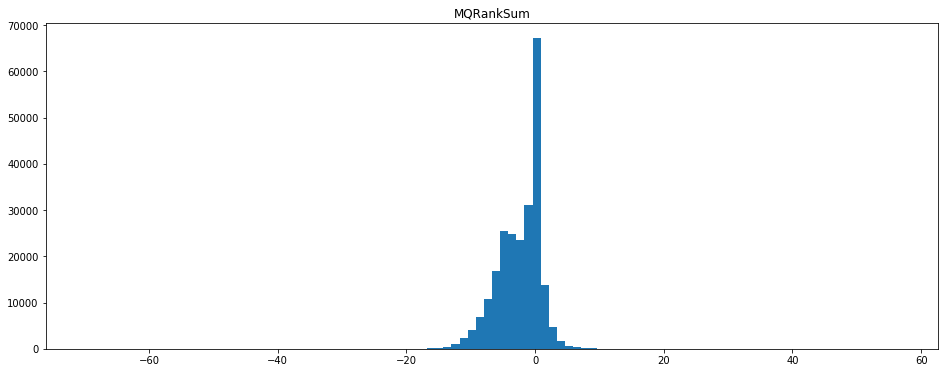

In [27]:
plt.hist( notdbsnp[ pandas.notna(notdbsnp['MQRankSum']) ]['MQRankSum'], bins=100)
plt.title('MQRankSum')
plt.show()

In [28]:
notdbsnp[ notdbsnp['MQRankSum'] < -12.5 ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
182961,1,124804713,C,G,3892.77,2,NaN,7.37,22.92,528,99,9.964,-13.113,1.661
186464,1,125167447,T,C,17501.80,2,NaN,31.82,33.36,550,99,77.224,-12.874,6.929
186467,1,125167538,A,G,13652.80,2,NaN,30.00,34.10,386,99,204.539,-12.573,4.781
186604,1,125176538,T,A,6967.77,2,NaN,18.83,36.67,370,99,57.586,-13.462,3.602
186611,1,125176852,C,T,17528.80,2,NaN,33.97,40.12,516,99,124.525,-13.596,4.691
186614,1,125176938,G,T,25267.80,2,NaN,31.19,38.71,810,99,44.337,-12.987,0.855
186615,1,125176947,A,G,30188.80,2,NaN,27.98,39.63,1079,99,15.792,-13.123,-3.155
186622,1,125177238,A,T,27323.80,2,NaN,33.98,36.19,804,99,79.571,-15.286,-0.486
186623,1,125177265,G,T,32456.80,2,NaN,34.49,36.04,941,99,48.295,-14.956,0.148
186648,1,125178382,G,A,15726.80,2,NaN,5.00,36.87,3146,99,70.437,-26.698,-15.558


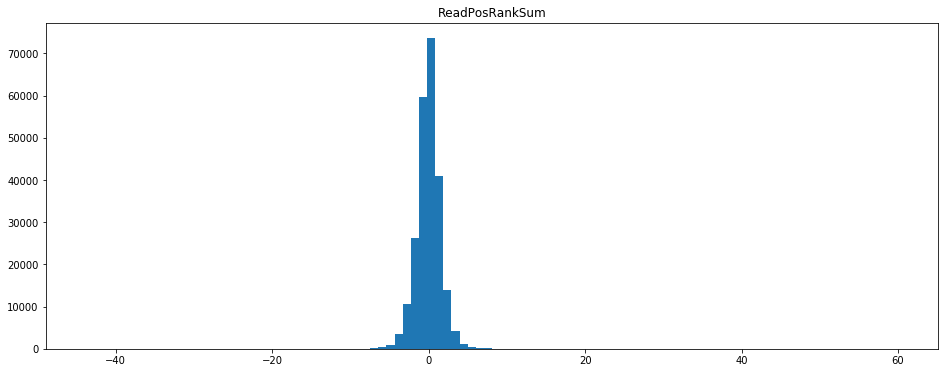

In [29]:
plt.hist(notdbsnp[ pandas.notna(notdbsnp['ReadPosRankSum']) ]['ReadPosRankSum'], bins=100)
plt.title('ReadPosRankSum')
plt.show()

In [30]:
notdbsnp[ notdbsnp['ReadPosRankSum'] <  -8.0 ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
4357,1,2654257,T,C,315.77,2,NaN,0.93,52.32,338,99,8.453,-9.242,-10.481
186648,1,125178382,G,A,15726.80,2,NaN,5.00,36.87,3146,99,70.437,-26.698,-15.558
186676,1,125180005,G,A,4616.77,2,NaN,0.25,33.76,18564,99,4.295,8.044,-22.288
186680,1,125180775,G,T,6876.77,2,NaN,2.98,26.59,2304,99,0.000,-9.700,-14.751
186708,1,125181962,C,G,748.77,2,NaN,1.32,38.45,569,99,93.381,4.484,-9.007
186934,1,143192785,T,C,62621.80,2,NaN,23.60,33.41,2654,99,3.497,-3.844,-24.581
186937,1,143192982,A,T,4408.77,2,NaN,2.39,27.61,1846,99,29.531,12.661,-17.887
186938,1,143192983,T,G,4607.77,2,NaN,2.48,27.60,1855,99,40.011,12.799,-18.334
186970,1,143195308,G,A,9216.77,2,NaN,7.52,44.31,1226,99,121.099,-23.158,-22.516
187393,1,143213041,T,G,73710.80,2,NaN,26.65,24.60,2766,99,28.657,-15.723,-9.218


In [31]:
notdbsnp[ ( notdbsnp['QUAL'] > 5000 ) & ( notdbsnp['QD'] > 10 ) & ( notdbsnp['FMT/DP'] > 20 ) & ( notdbsnp['FMT/GQ'] > 90 ) & ( notdbsnp['MQ'] > 50 ) ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
184701,1,125079862,T,C,6737.77,2,NaN,27.96,58.25,241,99,10.311,-0.525,-0.709
184723,1,125080306,T,C,5296.77,2,NaN,21.27,59.90,249,99,1.603,-0.001,-0.018
184727,1,125080369,C,T,15917.80,2,NaN,30.00,59.91,445,99,1.711,-0.033,-0.035
184731,1,125080404,T,C,15508.80,2,NaN,30.00,59.65,434,99,5.442,-0.001,-0.453
184736,1,125080458,G,A,11432.80,2,NaN,25.46,59.46,449,99,0.540,-0.000,0.100
184737,1,125080489,T,A,12999.80,2,NaN,26.32,59.43,494,99,0.000,-0.115,0.296
184761,1,125081164,C,T,5672.77,2,NaN,13.47,56.98,421,99,2.550,-1.900,1.816
184763,1,125081181,T,G,14879.80,2,NaN,30.00,57.59,412,99,1.594,-1.507,-0.893
184768,1,125081269,G,A,13291.80,2,NaN,30.00,57.89,379,99,1.750,-2.157,0.730
184769,1,125081273,A,G,8901.77,2,NaN,22.65,57.52,393,99,2.696,-1.198,0.999


In [32]:
notdbsnp[ ( notdbsnp['QD'] < 2 ) & ( notdbsnp['FS'] > 60 ) & ( notdbsnp['MQ'] < 40 ) & ( notdbsnp['MQRankSum']  <  -12.5  ) & ( notdbsnp['ReadPosRankSum']  <  -8.0 )]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
